In [2]:
%pip install librosa

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for librosa from https://files.pythonhosted.org/packages/8c/8a/2d231b35456506b7c98b3ab9bbf07917b205fed8615d2e59e976ab497fff/librosa-0.10.2.post1-py3-none-any.whl.metadata
  Obtaining dependency information for audioread>=2.1.9 from https://files.pythonhosted.org/packages/57/8d/30aa32745af16af0a9a650115fbe81bde7c610ed5c21b381fca0196f3a7f/audioread-3.0.1-py3-none-any.whl.metadata
  Obtaining dependency information for numba>=0.51.0 from https://files.pythonhosted.org/packages/50/68/d58351398ae9c6796fd010f9cf820db4c4a78ff0acb0aa02d940aa08a61e/numba-0.59.1-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for pooch>=1.1 from https://files.pythonhosted.org/packages/f4/72/8ae0f1ba4ce6a4f6d4d01a60a9fdf690fde188c45c1872b0b4ddb0607ace/pooch-1.8.1-py3-none-any.whl.metadata
  Obtaining dependency information for soxr>=0.3.2 from https://files.pythonhosted.org/packag


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


EDA on Audio Data within Zip Files:
  
We will perform exploratory data analysis (EDA) on audio data from the DAIC-WOZ dataset, which is stored within zip files. The steps include accessing audio files directly from zip archives, calculating summary statistics, visualizing waveforms and spectrograms, performing noise removal, and extracting audio features.

1. Access Audio Files Directly from Zip

In [4]:
import os
import zipfile
import io
import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

# Directory containing the zip files
zip_dir = 'E:/Daic Woz Dataset'

# List all zip files
zip_files = [os.path.join(zip_dir, f) for f in os.listdir(zip_dir) if f.endswith('_P.zip')]

# Function to read audio from a zip file
def read_audio_from_zip(zip_file_path, audio_filename):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        with zip_ref.open(audio_filename) as audio_file:
            audio_data, sr = librosa.load(io.BytesIO(audio_file.read()), sr=None)
    return audio_data, sr

# Example: Read an audio file from a zip
audio_file = '300_AUDIO.wav'
audio_data, sr = read_audio_from_zip(zip_files[0], audio_file)

# Print basic info about the audio file
print(f'Sample Rate: {sr}')
print(f'Audio Duration: {len(audio_data)/sr} seconds')


Sample Rate: 16000
Audio Duration: 648.5 seconds


2.Summary Statistics

In [5]:
# Function to calculate summary statistics for audio data
def calculate_audio_summary_stats(audio_data):
    return {
        'mean': np.mean(audio_data),
        'std': np.std(audio_data),
        'min': np.min(audio_data),
        'max': np.max(audio_data),
        'rms': np.sqrt(np.mean(audio_data**2)),
        'zero_crossing_rate': np.mean(librosa.feature.zero_crossing_rate(audio_data)),
    }

# Calculate summary statistics for the example audio file
summary_stats = calculate_audio_summary_stats(audio_data)
print(summary_stats)


{'mean': 2.807582e-07, 'std': 0.026718462, 'min': -0.4364624, 'max': 0.48135376, 'rms': 0.02671846, 'zero_crossing_rate': 0.09178793626794877}


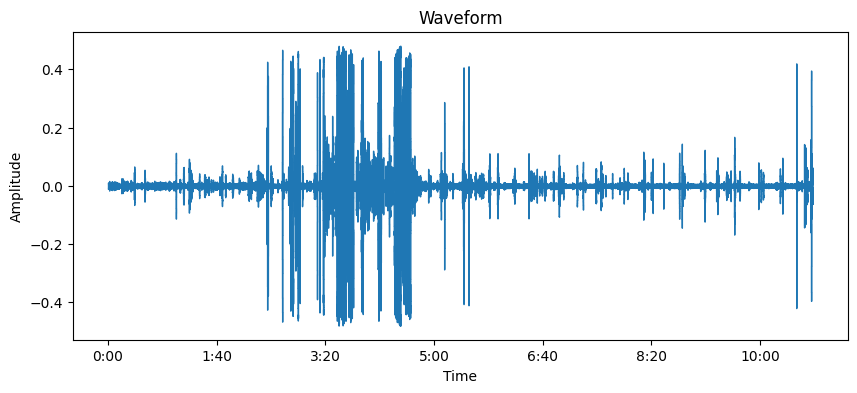

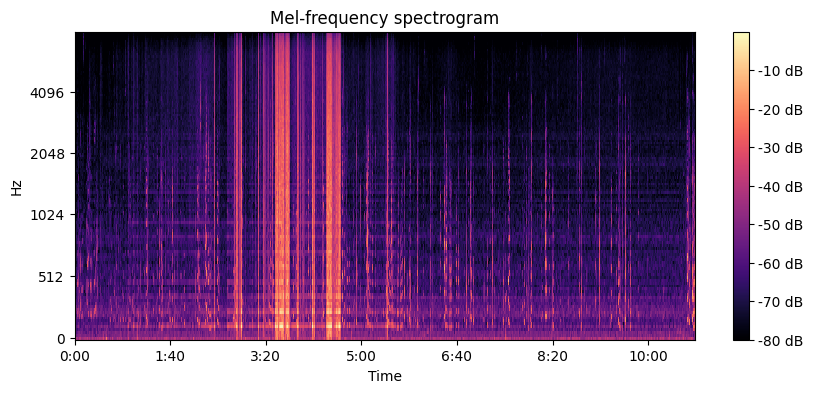

In [6]:
# Plot waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(audio_data, sr=sr)
plt.title('Waveform')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

# Generate and plot spectrogram
S = librosa.feature.melspectrogram(y=audio_data, sr=sr, n_mels=128)
S_DB = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(10, 4))
librosa.display.specshow(S_DB, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.show()


4. Noise Removal

In [8]:
%pip install noisereduce

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for noisereduce from https://files.pythonhosted.org/packages/f0/5e/d3c72f395b71d1bf513cfa5b990dd5421aa74de3670eaab53e51ae6ce401/noisereduce-3.0.2-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


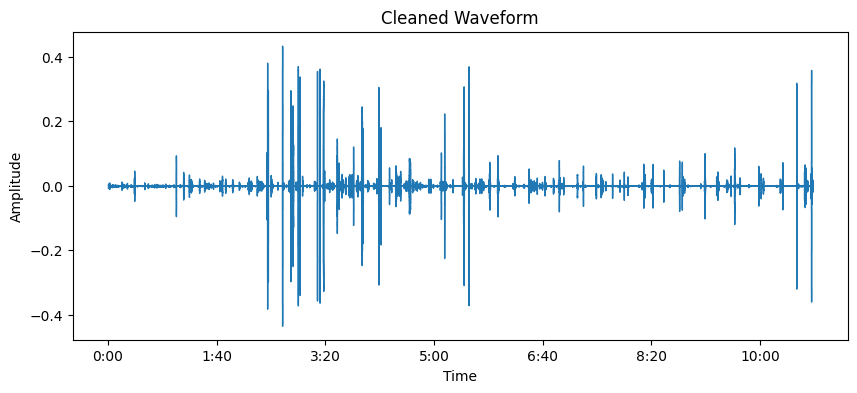

In [9]:
import noisereduce as nr

# Perform noise reduction
reduced_noise = nr.reduce_noise(y=audio_data, sr=sr)

# Plot the cleaned waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(reduced_noise, sr=sr)
plt.title('Cleaned Waveform')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()


5. Feature Extraction:
Extract relevant features such as MFCCs directly from the audio data in the zip files.

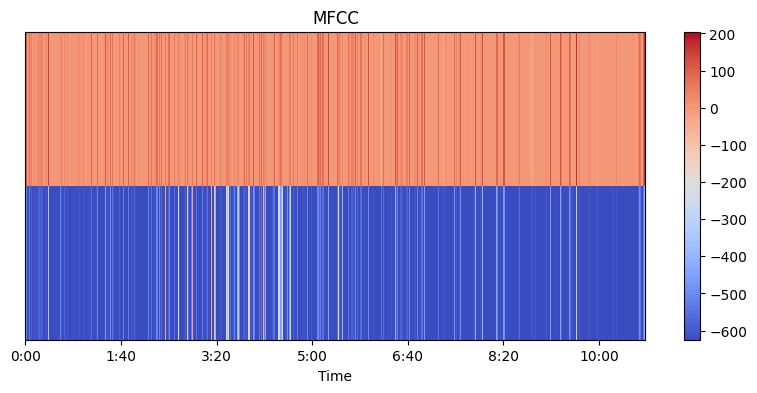

In [14]:
# Extract MFCC features
mfccs = librosa.feature.mfcc(y=reduced_noise, sr=sr, n_mfcc=2)

# Plot MFCC
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.show()


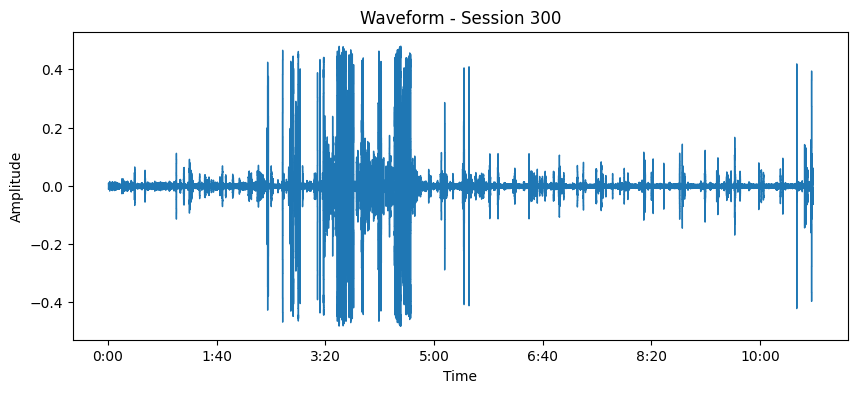

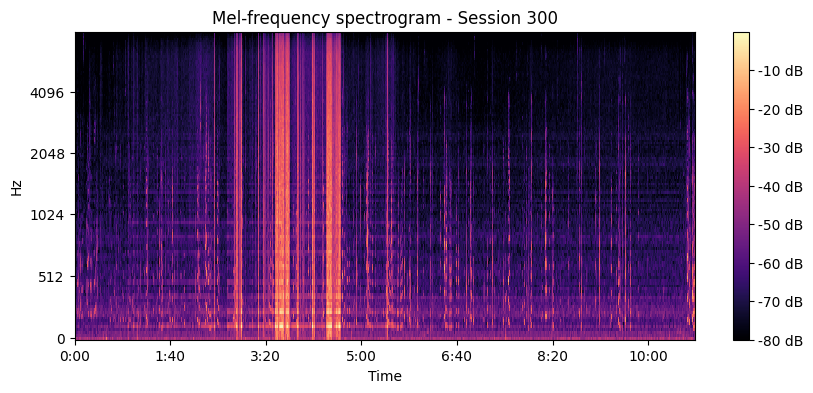

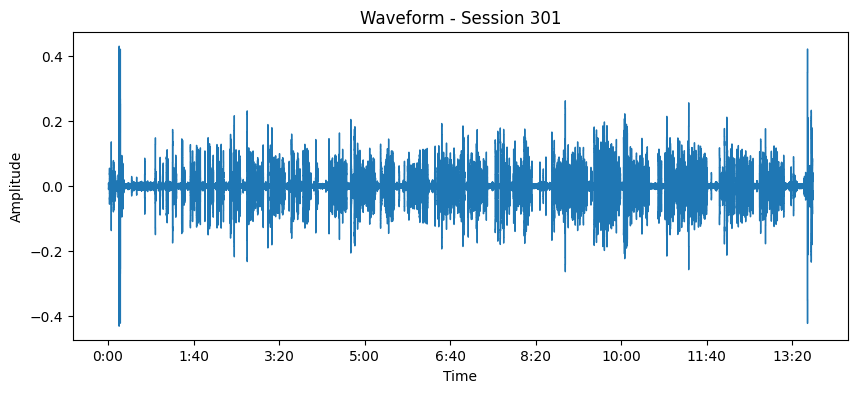

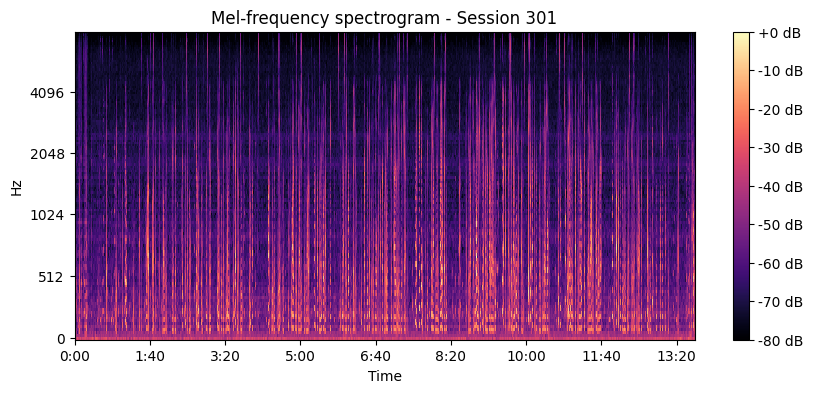

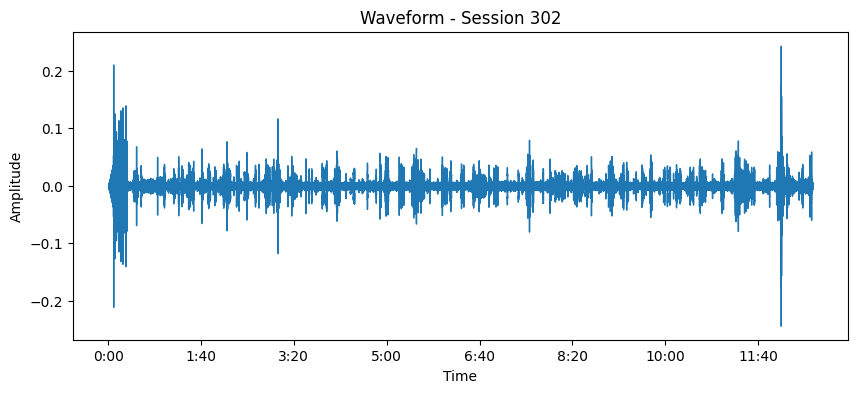

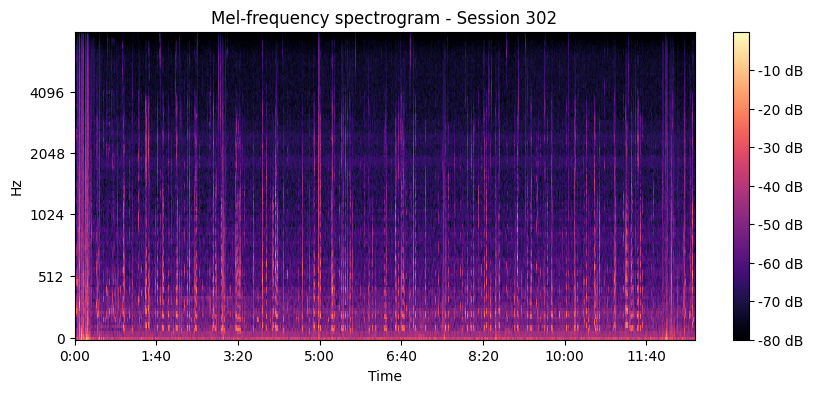

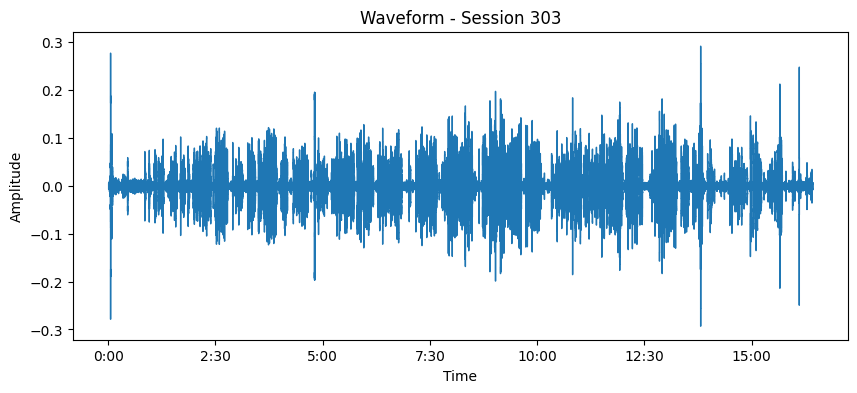

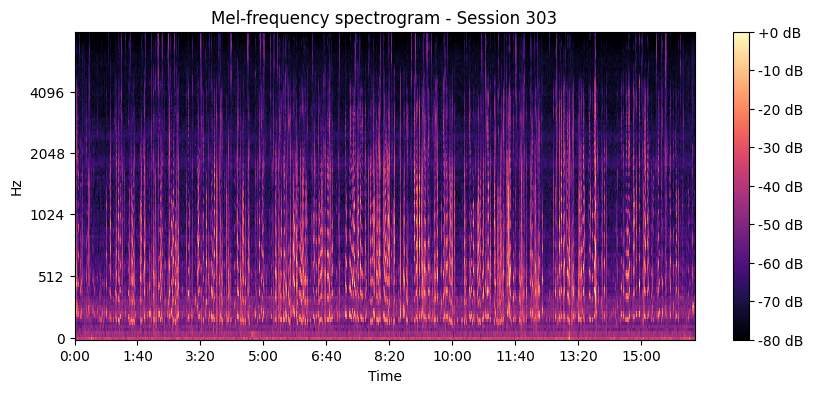

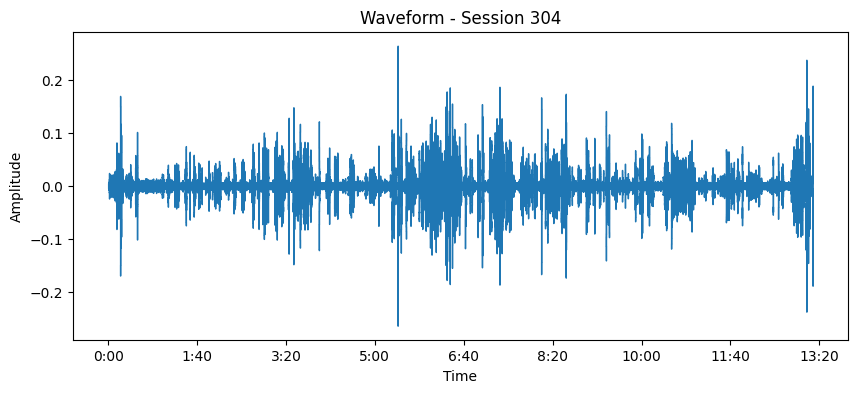

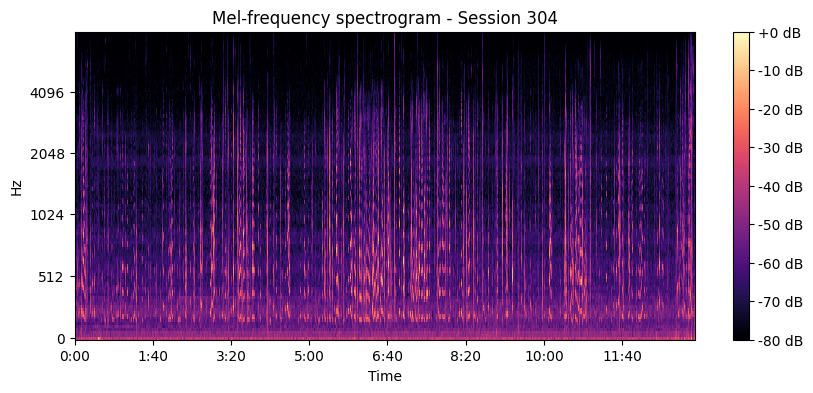

           mean       std       min       max       rms  zero_crossing_rate  \
0  2.807582e-07  0.026718 -0.436462  0.481354  0.026718            0.091788   
1 -6.925256e-07  0.014107 -0.257080  0.431488  0.014107            0.075145   
2  9.459323e-08  0.004842 -0.173889  0.243744  0.004842            0.062966   
3  5.610156e-08  0.010909 -0.231049  0.292267  0.010909            0.072012   
4 -5.474639e-07  0.007965 -0.264069  0.253235  0.007965            0.059752   

  session_number  
0            300  
1            301  
2            302  
3            303  
4            304  


In [16]:
import pandas as pd
# Initialize a list to store summary statistics for all sessions
all_summary_stats = []

# Iterate over each zip file
for zip_file in zip_files:
    # Extract session number from the zip file name
    session_number = os.path.basename(zip_file).split('_')[0]
    audio_file = f'{session_number}_AUDIO.wav'
    
    # Read the audio file from the zip
    audio_data, sr = read_audio_from_zip(zip_file, audio_file)
    
    # Calculate summary statistics
    summary_stats = calculate_audio_summary_stats(audio_data)
    summary_stats['session_number'] = session_number
    all_summary_stats.append(summary_stats)
    
    # Plot waveform and spectrogram for the first few files (for visualization purposes)
    if int(session_number) < 305:
        plt.figure(figsize=(10, 4))
        librosa.display.waveshow(audio_data, sr=sr)
        plt.title(f'Waveform - Session {session_number}')
        plt.xlabel('Time')
        plt.ylabel('Amplitude')
        plt.show()

        S = librosa.feature.melspectrogram(y=audio_data, sr=sr, n_mels=128)
        S_DB = librosa.power_to_db(S, ref=np.max)

        plt.figure(figsize=(10, 4))
        librosa.display.specshow(S_DB, sr=sr, x_axis='time', y_axis='mel')
        plt.colorbar(format='%+2.0f dB')
        plt.title(f'Mel-frequency spectrogram - Session {session_number}')
        plt.show()

# Convert summary statistics to a DataFrame for further analysis
summary_stats_df = pd.DataFrame(all_summary_stats)
print(summary_stats_df.head())


Enotropy

In [17]:
from scipy.stats import entropy

def calculate_entropy(audio_data):
    histogram, _ = np.histogram(audio_data, bins=256)
    return entropy(histogram)

audio_entropy = calculate_entropy(audio_data)
print(f'Entropy: {audio_entropy}')


Entropy: 0.70713902727634


Save Descriptive stats in one csv file

In [18]:
# Initialize a list to store summary statistics for all sessions
all_summary_stats = []

# Iterate over each session from 300 to 492
for session_number in range(300, 493):
    try:
        # Format session number to match file names
        session_str = str(session_number).zfill(3)

        # Define the zip file path for the session
        zip_file_path = os.path.join(zip_dir, f"{session_str}_P.zip")

        # Define the audio file name for the session
        audio_file_name = f"{session_str}_AUDIO.wav"

        # Read the audio file from the zip
        audio_data, sr = read_audio_from_zip(zip_file_path, audio_file_name)

        # Calculate summary statistics
        summary_stats = calculate_audio_summary_stats(audio_data)
        summary_stats['session_number'] = session_number

        # Append summary statistics to the list
        all_summary_stats.append(summary_stats)

    except Exception as e:
        print(f"Error processing session {session_number}: {str(e)}")
        continue

# Convert summary statistics to a DataFrame
summary_stats_df = pd.DataFrame(all_summary_stats)

# Save the summary statistics to a CSV file
summary_stats_df.to_csv('audio_summary_stats.csv', index=False)

# Display the first few rows of the summary statistics DataFrame
print(summary_stats_df.head())


Error processing session 342: [Errno 2] No such file or directory: 'E:/Daic Woz Dataset\\342_P.zip'
Error processing session 394: [Errno 2] No such file or directory: 'E:/Daic Woz Dataset\\394_P.zip'
Error processing session 398: [Errno 2] No such file or directory: 'E:/Daic Woz Dataset\\398_P.zip'
Error processing session 460: [Errno 2] No such file or directory: 'E:/Daic Woz Dataset\\460_P.zip'
Error processing session 466: [Errno 2] No such file or directory: 'E:/Daic Woz Dataset\\466_P.zip'
           mean       std       min       max       rms  zero_crossing_rate  \
0  2.807582e-07  0.026718 -0.436462  0.481354  0.026718            0.091788   
1 -6.925256e-07  0.014107 -0.257080  0.431488  0.014107            0.075145   
2  9.459323e-08  0.004842 -0.173889  0.243744  0.004842            0.062966   
3  5.610156e-08  0.010909 -0.231049  0.292267  0.010909            0.072012   
4 -5.474639e-07  0.007965 -0.264069  0.253235  0.007965            0.059752   

   session_number  
0    

In [20]:
 

# Directory containing the zip files
zip_dir = 'E:/Daic Woz Dataset'

# List all zip files
zip_files = [os.path.join(zip_dir, f) for f in os.listdir(zip_dir) if f.endswith('_P.zip')]

# Function to read CSV file from a zip
def read_csv_from_zip(zip_file_path, csv_filename):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        with zip_ref.open(csv_filename) as csv_file:
            df = pd.read_csv(csv_file)
    return df

 #Read COVAREP.csv from a zip
covarep_df = read_csv_from_zip(zip_files[0], '300_COVAREP.csv')

# Read FORMANT.csv from a zip
formant_df = read_csv_from_zip(zip_files[0], '300_FORMANT.csv')

 